<a href="https://colab.research.google.com/github/mridul-eecs/IrisRecognitionSystem/blob/master/irislocatorSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/thuyngch/Iris-Recognition

Cloning into 'Iris-Recognition'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 3896 (delta 1), reused 0 (delta 0), pack-reused 3889
Receiving objects: 100% (3896/3896), 71.56 MiB | 23.15 MiB/s, done.
Resolving deltas: 100% (1818/1818), done.
Checking out files: 100% (1826/1826), done.


In [0]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
# Creating custom Iris not iris dataset 
datadir= "/content/Iris-Recognition/MMU2"
dirs= os.listdir(datadir)
samples= []
for d in dirs:
  filesind= os.listdir(os.path.join(datadir, d))
  pick= random.randint(0, (len(filesind)-1))
  samples.append(os.path.join(datadir, d, filesind[pick]))

len(samples)

100

In [0]:
!mkdir data
samples[0]

'/content/Iris-Recognition/MMU2/69/690205.bmp'

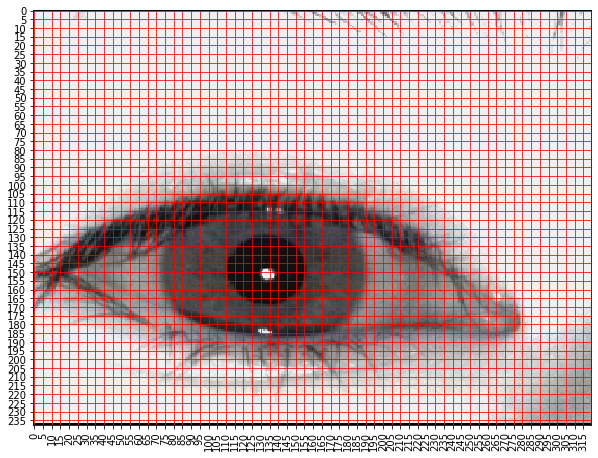

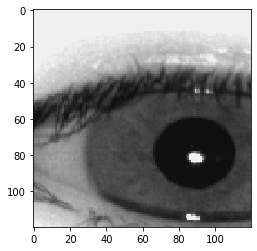

/content/Iris-Recognition/MMU2/64/640104.bmp
/content/data/iris_640104.bmp
36 ['iris_140102.bmp', 'iris_670105.bmp', 'iris_920103.bmp', 'iris_980202.bmp', 'iris_380101.bmp', 'iris_460102.bmp', 'iris_700205.bmp', 'iris_910103.bmp', 'iris_740101.bmp', 'iris_570105.bmp', 'iris_780201.bmp', 'iris_660204.bmp', 'iris_240204.bmp', 'iris_120203.bmp', 'iris_640104.bmp', 'iris_770201.bmp', 'iris_040102.bmp', 'iris_210104.bmp', 'iris_350101.bmp', 'iris_440203.bmp', 'iris_580103.bmp', 'iris_470201.bmp', 'iris_020204.bmp', 'iris_880103.bmp', 'iris_330101.bmp', 'iris_200103.bmp', 'iris_160103.bmp', 'iris_800101.bmp', 'iris_550102.bmp', 'iris_850202.bmp', 'iris_490104.bmp', 'iris_070203.bmp', 'iris_840202.bmp', 'iris_690205.bmp', 'iris_290203.bmp', 'iris_010203.bmp']


In [0]:
%matplotlib inline
id= 36
img= cv2.imread(samples[id])
plt.figure(figsize= (10, 10))
plt.xticks(np.arange(0, img.shape[1], 5), rotation= 90)
plt.yticks(np.arange(0, img.shape[0], 5))
plt.imshow(img)


plt.grid(color= 'r')

plt.show()
x= 80
y= 50
centerx, centery = 130, 105
img= img[ centerx-60:centerx+60, centery-60:centery+60 , : ]
# img= img[ y:y+120 , x:x+120 , : ]
plt.figure()
plt.imshow(img)
plt.show()

filename= "iris_" + samples[id].split('/')[5:][0]
newpath= samples[id].split('/')[:2] + ["data", filename] 
newid= '/'.join(newpath)
print(samples[id])
print(newid)
cv2.imwrite(newid, img) 
print(len(os.listdir('/content/data')), os.listdir(os.path.split(newid)[0]))


In [0]:
# sliding window
id= 36
img= cv2.imread(samples[id])
imgsizex, imgsizey= 120, 120 
centerminx, centerminy= 60, 60
centermaxx, centermaxy= img.shape[0]- 60, img.shape[1]- 60
cropped_img= img[int(centerx-(imgsizex/2)):int(centerx+(imgsizex/2)) , int(centery-(imgsizey/2)):int(centery+(imgsizey/2)) , :]
# cropped_img= img[ 0:60 , 0:60 , :]
# plt.imshow(cropped_img)
# plt.figure()
# plt.imshow(img)

for i in range(centerminx, centermaxx, 30):
  for j in range(centerminy, centermaxy, 5):
    cropped_img= img[int(i-(imgsizex/2)):int(i+(imgsizex/2)) , int(j-(imgsizey/2)):int(j+(imgsizey/2)) , :]
    cv2.imwrite("/content/testdata/{}_{}.jpg".format(i, j), cropped_img)



len(os.listdir('/content/testdata'))

160

In [0]:
!mkdir testdata
# !rm -rf testdata

In [0]:
!zip -r testdata.zip, testdata

  adding: testdata/ (stored 0%)
  adding: testdata/150_120.jpg (deflated 3%)
  adding: testdata/60_235.jpg (deflated 13%)
  adding: testdata/120_160.jpg (deflated 4%)
  adding: testdata/120_220.jpg (deflated 5%)
  adding: testdata/90_145.jpg (deflated 7%)
  adding: testdata/90_115.jpg (deflated 6%)
  adding: testdata/90_110.jpg (deflated 6%)
  adding: testdata/120_145.jpg (deflated 4%)
  adding: testdata/90_205.jpg (deflated 8%)
  adding: testdata/150_145.jpg (deflated 3%)
  adding: testdata/120_155.jpg (deflated 4%)
  adding: testdata/150_250.jpg (deflated 4%)
  adding: testdata/60_190.jpg (deflated 9%)
  adding: testdata/60_105.jpg (deflated 12%)
  adding: testdata/150_215.jpg (deflated 3%)
  adding: testdata/90_125.jpg (deflated 6%)
  adding: testdata/60_230.jpg (deflated 11%)
  adding: testdata/120_65.jpg (deflated 4%)
  adding: testdata/150_225.jpg (deflated 3%)
  adding: testdata/90_175.jpg (deflated 7%)
  adding: testdata/60_135.jpg (deflated 8%)
  adding: testdata/120_195.jpg (

In [0]:
!zip -r data.zip /content/data


updating: content/data/ (stored 0%)
  adding: content/data/iris_140102.bmp (deflated 68%)
  adding: content/data/iris_670105.bmp (deflated 69%)
  adding: content/data/iris_920103.bmp (deflated 66%)
  adding: content/data/iris_980202.bmp (deflated 73%)
  adding: content/data/iris_380101.bmp (deflated 67%)
  adding: content/data/iris_460102.bmp (deflated 68%)
  adding: content/data/iris_700205.bmp (deflated 67%)
  adding: content/data/iris_910103.bmp (deflated 70%)
  adding: content/data/iris_740101.bmp (deflated 65%)
  adding: content/data/iris_570105.bmp (deflated 69%)
  adding: content/data/iris_780201.bmp (deflated 69%)
  adding: content/data/iris_660204.bmp (deflated 67%)
  adding: content/data/iris_240204.bmp (deflated 68%)
  adding: content/data/iris_120203.bmp (deflated 68%)
  adding: content/data/iris_640104.bmp (deflated 70%)
  adding: content/data/iris_770201.bmp (deflated 69%)
  adding: content/data/iris_040102.bmp (deflated 69%)
  adding: content/data/iris_210104.bmp (deflat

In [0]:
!unzip testdata_11.zip -d testdata11/

In [0]:

#creating a Histogram
def ExtractColorHistogram(image, nbins=32, bins_range=(0,255), resize=None):
    if(resize !=None):
        image= cv2.resize(image, resize)
    zero_channel= np.histogram(image[:,:,0], bins=nbins, range=bins_range)
    first_channel= np.histogram(image[:,:,1], bins=nbins, range=bins_range)
    second_channel= np.histogram(image[:,:,2], bins=nbins, range=bins_range)
    return zero_channel,first_channel, second_channel

#Find Center of the bin edges
def FindBinCenter(histogram_channel):
    bin_edges = histogram_channel[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    return bin_centers

#Extracting Color Features from bin lengths
def ExtractColorFeatures(zero_channel, first_channel, second_channel):
    return np.concatenate((zero_channel[0], first_channel[0], second_channel[0]))



In [0]:
#reading image paths with glob
import glob
vehicle_image_arr = glob.glob('/content/data/*.bmp')
# read images and append to list
vehicle_images_original=[]
for imagePath in vehicle_image_arr:
    readImage=cv2.imread(imagePath)
    rgbImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2RGB)
    vehicle_images_original.append(rgbImage)

print('Reading of Vehicle Images Done')

non_vehicle_image_arr = glob.glob('/content/testdata11/*/*.jpg')


non_vehicle_images_original=[]
for imagePath in non_vehicle_image_arr:
    readImage=cv2.imread(imagePath)
    rgbImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2RGB)
    non_vehicle_images_original.append(rgbImage)

print("Reading of Non Vehicle Images Done")

print("No of Vehicle Images Loaded -"+ str(len(vehicle_image_arr)))
print("No of Non-Vehicle Images Loaded -"+ str(len(non_vehicle_images_original)))

Reading of Vehicle Images Done
Reading of Non Vehicle Images Done
No of Vehicle Images Loaded -36
No of Non-Vehicle Images Loaded -764


No of features are 384


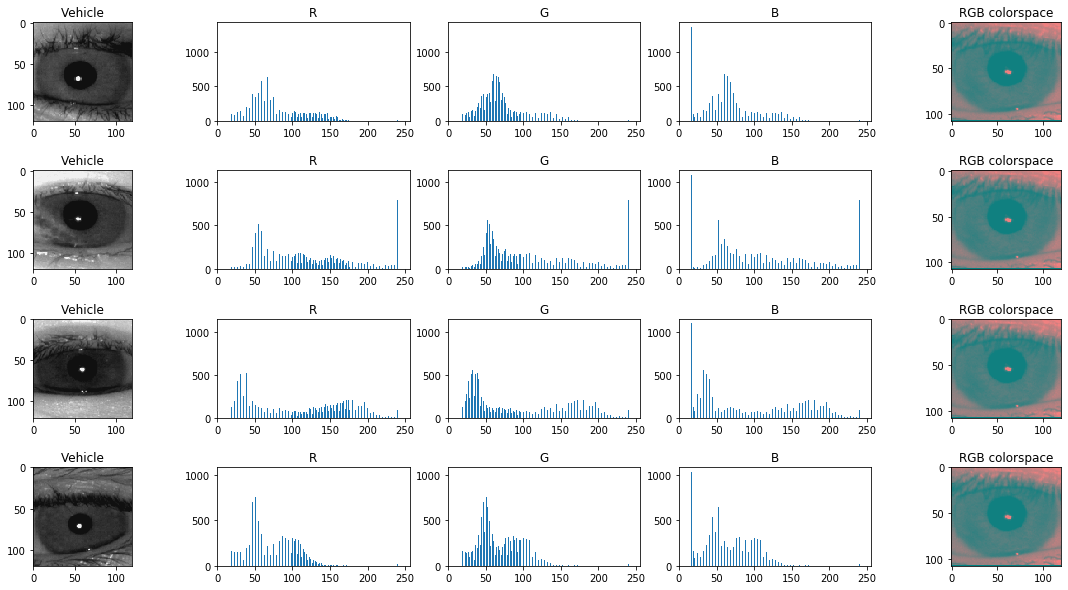

In [0]:
# Checking Color Features for Vehicles

f, axes= plt.subplots(4,5, figsize=(20,10))
f.subplots_adjust(hspace=0.5)

for index in range(4):
    
    vehicle=random.randint(0, len(vehicle_images_original)-1)
    non_vehicle=random.randint(0, len(non_vehicle_images_original)-1)
    
    # coloredImage= cv2.cvtColor(vehicle_images_original[vehicle],cv2.COLOR_RGB2YUV)
    r,g,b = ExtractColorHistogram(vehicle_images_original[vehicle],128)
   
    center= FindBinCenter(r)
    axes[index,0].imshow(vehicle_images_original[vehicle])
    axes[index,0].set_title("Vehicle")
    axes[index,1].set_xlim(0,256)
    axes[index,1].bar(center,r[0])
    axes[index,1].set_title("R")
    axes[index,2].set_xlim(0,256)
    axes[index,2].bar(center,g[0])
    axes[index,2].set_title("G")
    axes[index,3].set_xlim(0,256)
    axes[index,3].bar(center,b[0])
    axes[index,3].set_title("B")
    axes[index,4].imshow(coloredImage)
    axes[index,4].set_title("RGB colorspace")
    
features = ExtractColorFeatures(r,g,b)
print("No of features are "+ str(len(features)))

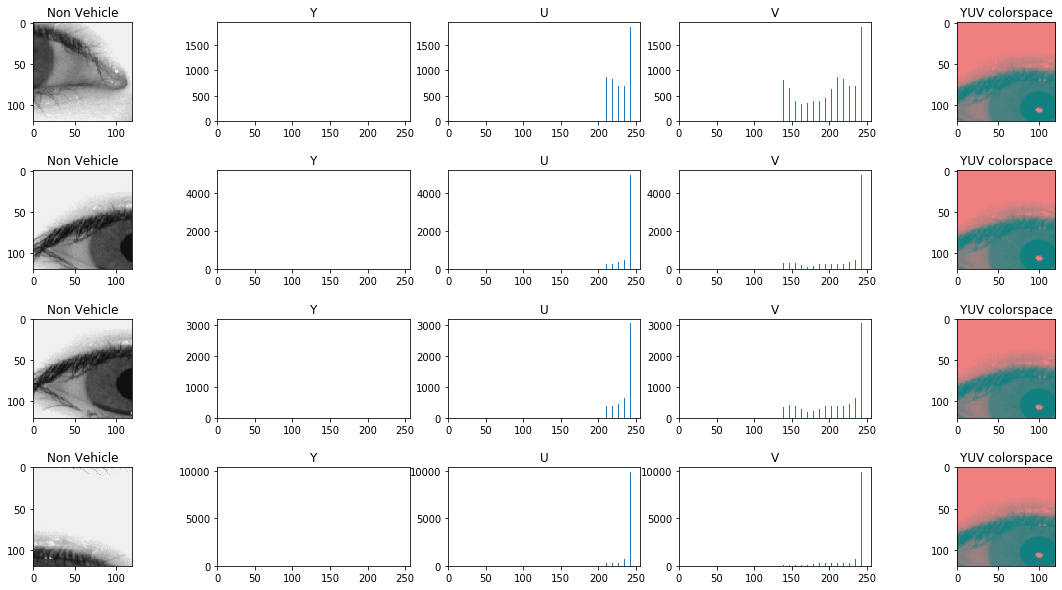

In [0]:
# Checking Color Features for Non Vehicles

f, axes= plt.subplots(4,5, figsize=(20,10))
f.subplots_adjust(hspace=0.5)

for index in range(4):
    non_vehicle=random.randint(0, len(non_vehicle_images_original)-1)
    # coloredImage= cv2.cvtColor(non_vehicle_images_original[non_vehicle],cv2.COLOR_RGB2YUV)
    r,g,b = ExtractColorHistogram(non_vehicle_images_original[non_vehicle])
    
    center= FindBinCenter(r)
    axes[index,0].imshow(non_vehicle_images_original[non_vehicle])
    axes[index,0].set_title("Non Vehicle")
    axes[index,1].set_xlim(0,256)
    axes[index,1].bar(center,r[0])
    axes[index,1].set_title("R")
    axes[index,2].set_xlim(0,256)
    axes[index,2].bar(center,g[0])
    axes[index,2].set_title("G")
    axes[index,3].set_xlim(0,256)
    axes[index,3].bar(center,b[0])
    axes[index,3].set_title("B")
    axes[index,4].imshow(coloredImage)
    axes[index,4].set_title("RGB colorspace")

In [0]:
from skimage.feature import hog
def GetFeaturesFromHog(image,orient,cellsPerBlock,pixelsPerCell, visualise= False, feature_vector_flag=True):
    if(visualise==True):
        hog_features, hog_image = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualize=True, feature_vector=feature_vector_flag)
        return hog_features, hog_image
    else:
        hog_features = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualize=False, feature_vector=feature_vector_flag)
        return hog_features

Feature Vector Length Returned is  7056
No of features that can be extracted from image  14400


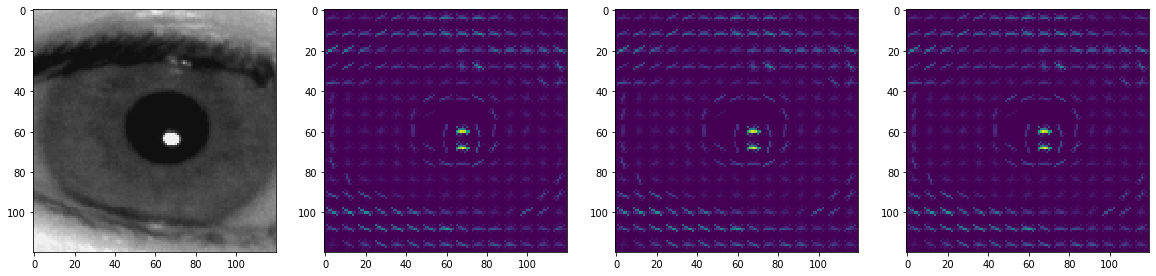

In [0]:

#testing HOG on test images

image=vehicle_images_original[1]
image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
image_channel_0=image[:,:,0]
image_channel_1=image[:,:,0]
image_channel_2=image[:,:,0]

feature_0,hog_img_0=GetFeaturesFromHog(image_channel_0,9,2,8,visualise=True,feature_vector_flag=True)
feature_1,hog_img_1=GetFeaturesFromHog(image_channel_1,9,2,8,visualise=True,feature_vector_flag=True)
feature_2,hog_img_2=GetFeaturesFromHog(image_channel_2,9,2,8,visualise=True,feature_vector_flag=True)

f, axes= plt.subplots(1,4,figsize=(20,10))
axes[0].imshow(vehicle_images_original[1])
axes[1].imshow(hog_img_0)
axes[2].imshow(hog_img_1)
axes[3].imshow(hog_img_2)


print("Feature Vector Length Returned is ",len(feature_0))
print("No of features that can be extracted from image ",len(hog_img_0.ravel()))

In [0]:
#Convert Image Color Space. Note the colorspace parameter is like cv2.COLOR_RGB2YUV
def ConvertImageColorspace(image, colorspace):
    return cv2.cvtColor(image, colorspace)
# Method to extract the features based on the choices as available in step 2

def ExtractFeatures(images,orientation,cellsPerBlock,pixelsPerCell, convertColorspace=False):
    featureList=[]
    imageList=[]
    for i, image in enumerate(images):
        if image.shape[0]== 120 and image.shape[1] == 120:
          if(convertColorspace==True):
            image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
          local_features_1=GetFeaturesFromHog(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, False, True)
          local_features_2=GetFeaturesFromHog(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, False, True)
          local_features_3=GetFeaturesFromHog(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, False, True)
          x=np.hstack((local_features_1,local_features_2,local_features_3))
          featureList.append(x)

    return featureList



In [0]:
%%time

orientations=9
cellsPerBlock=2
pixelsPerBlock=12
convertColorSpace=False
vehicleFeatures= ExtractFeatures(vehicle_images_original,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)
nonVehicleFeatures= ExtractFeatures(non_vehicle_images_original,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)
print(np.shape(vehicleFeatures), np.shape(nonVehicleFeatures))

(32, 8748) (764, 8748)
CPU times: user 10.4 s, sys: 34 ms, total: 10.4 s
Wall time: 10.5 s


In [0]:
# View as dataframe


In [0]:
featuresList= np.vstack([vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         vehicleFeatures,
                         nonVehicleFeatures])
print("Shape of features list is ", featuresList.shape)
labelList= np.concatenate([np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.ones(len(vehicleFeatures)), 
                           np.zeros(len(nonVehicleFeatures))])
print("Shape of label list is ", labelList.shape)


Shape of features list is  (1596, 8748)
Shape of label list is  (1596,)


In [0]:
# train test split of data

from sklearn.model_selection import train_test_split

X_train,  X_test,Y_train, Y_test = train_test_split(featuresList, labelList, test_size=0.2, shuffle=True)

In [0]:
# normalization and scaling

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [0]:
%%time

# Train a Linear SVM classifer
from sklearn.svm import LinearSVC
classifier1= LinearSVC(class_weight='balanced')
classifier1.fit(X_train,Y_train)
print("Accuracy of SVC is  ", classifier1.score(X_test,Y_test) )

Accuracy of SVC is   1.0
CPU times: user 13.2 s, sys: 8.04 ms, total: 13.2 s
Wall time: 13.2 s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# classifier 2 
from sklearn.ensemble import RandomForestClassifier as rf
classifier2= rf()
classifier2.fit(X_train, Y_train)
print("Accuracy of SVC is  ", classifier2.score(X_test,Y_test) )

Accuracy of SVC is   1.0


In [0]:
from sklearn.metrics import confusion_matrix

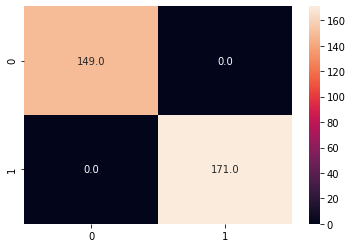

In [0]:
y_true= Y_test
y_pred= classifier2.predict(X_test)
cm= confusion_matrix(y_true, y_pred)
import seaborn as sns
sns.heatmap(cm, annot= True, fmt= '.1f')

In [0]:
from tqdm import tqdm_notebook as tqdm
result= 0;
for id in tqdm(range(100)):
  img= cv2.imread(samples[id])
  imgsizex, imgsizey= 120, 120 
  centerminx, centerminy= 60, 60
  centermaxx, centermaxy= img.shape[0]- 60, img.shape[1]- 60
  cropped_img= img[int(centerx-(imgsizex/2)):int(centerx+(imgsizex/2)) , int(centery-(imgsizey/2)):int(centery+(imgsizey/2)) , :]
  # cropped_img= img[ 0:60 , 0:60 , :]
  # plt.imshow(cropped_img)
  # plt.figure()
  # plt.imshow(img)
  orientation=9
  cellsPerBlock=2
  pixelsPerCell=8
  convertColorSpace=False
  for i in range(centerminx, centermaxx, 30):
    for j in range(centerminy, centermaxy, 5):
      cropped_img= img[int(i-(imgsizex/2)):int(i+(imgsizex/2)) , int(j-(imgsizey/2)):int(j+(imgsizey/2)) , :]
      local_features_1=GetFeaturesFromHog(cropped_img[:,:,0],orientation,cellsPerBlock,pixelsPerCell, False, True)
      local_features_2=GetFeaturesFromHog(cropped_img[:,:,1],orientation,cellsPerBlock,pixelsPerCell, False, True)
      local_features_3=GetFeaturesFromHog(cropped_img[:,:,2],orientation,cellsPerBlock,pixelsPerCell, False, True)
      x=np.hstack((local_features_1,local_features_2,local_features_3))    
      y= classifier2.predict(np.expand_dims(x, 0))
      result += 1
      # if int(y[0]) == 1:
      #   plt.figure()
      #   plt.imshow(cropped_img)
      #   plt.show()


result

ValueError: ignored

In [0]:
# function to draw sliding Windows

import matplotlib.image as mpimg

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    
    for bbox in bboxes:
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        color=(r, g, b)
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [0]:

# function to find the windows on which we are going to run the classifier

def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(120, 120), xy_overlap=(0.9, 0.9)):
   
    if x_start_stop[0] == None:
        x_start_stop[0]=0
    if x_start_stop[1] == None:
        x_start_stop[1]=img.shape[1]
    if y_start_stop[0] ==  None:
        y_start_stop[0]= 0
    if y_start_stop[1] ==  None:
        y_start_stop[1]=img.shape[0]
    
    
    window_list = []
    image_width_x= x_start_stop[1] - x_start_stop[0]
    image_width_y= y_start_stop[1] - y_start_stop[0]
     
    windows_x = np.int( 1 + (image_width_x - xy_window[0])/(xy_window[0] * xy_overlap[0]))
    windows_y = np.int( 1 + (image_width_y - xy_window[1])/(xy_window[1] * xy_overlap[1]))
    
    modified_window_size= xy_window
    for i in range(0,windows_y):
        y_start = y_start_stop[0] + np.int( i * modified_window_size[1] * xy_overlap[1])
        for j in range(0,windows_x):
            x_start = x_start_stop[0] + np.int( j * modified_window_size[0] * xy_overlap[0])
            
            x1 = np.int( x_start +  modified_window_size[0])
            y1= np.int( y_start + modified_window_size[1])
            window_list.append(((x_start,y_start),(x1,y1)))
    return window_list

In [0]:

# function that returns the refined Windows
# From Refined Windows we mean that the windows where the classifier predicts the output to be a car

def DrawCars(image,windows, converColorspace=False):
    refinedWindows=[]
    for window in windows:
        
        start= window[0]
        end= window[1]
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        
        if(clippedImage.shape[1] == clippedImage.shape[0] and clippedImage.shape[1]!=0):
            
            clippedImage=cv2.resize(clippedImage, (64,64))
            
            f1=ExtractFeatures([clippedImage], 9 , 2 , 16,converColorspace)
        
            predictedOutput=classifier1.predict([f1[0]])
            if(predictedOutput==1):
                refinedWindows.append(window)
        
    return refinedWindows

In [0]:

# trying out SubSampling using HOG but not able to go through as feature size is not the same.

def DrawCarsOptimised(image, image1, image2,windows, converColorspace=False):
    refinedWindows=[]
    for window in windows:
        
        start= window[0]
        end= window[1]
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        clippedImage1=image1[start[1]:end[1], start[0]:end[0]]
        clippedImage2=image2[start[1]:end[1], start[0]:end[0]]
        
        if(clippedImage.shape[1] == clippedImage.shape[0] and clippedImage.shape[1]!=0):
            
            clippedImage=cv2.resize(clippedImage, (120,120)).ravel()
            clippedImage1=cv2.resize(clippedImage1, (120,120)).ravel()
            clippedImage2=cv2.resize(clippedImage2, (120,120)).ravel()
            
            #f1=ExtractFeatures([clippedImage], 9 , 2 , 16,converColorspace)
            f1= np.hstack((clippedImage,clippedImage1,clippedImage2))
            f1=scaler.transform(f1.reshape(1,-1))   
            print(f1.shape)
            predictedOutput=classifier1.predict([f1[0]])
            if(predictedOutput==1):
                refinedWindows.append(window)
        
    return refinedWindows

Total No of windows are  32


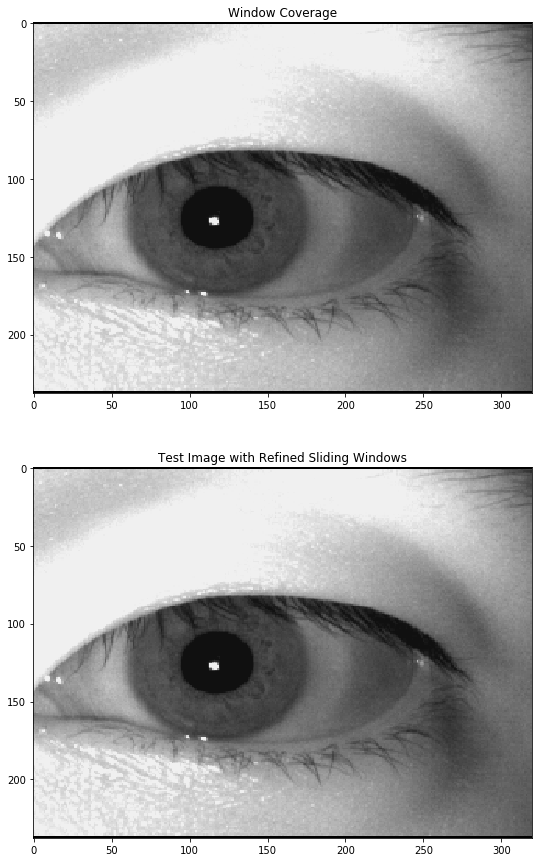

In [0]:
#testing our functions of slide_window and draw window. Defining here dummy windows

image = mpimg.imread('/content/Iris-Recognition/MMU2/69/690205.bmp')

windows1 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,464], 
                    xy_window=(120,120), xy_overlap=(0.15, 0.15))
windows4 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,480], 
                    xy_window=(160,160), xy_overlap=(0.2, 0.2))
windows2 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,612], 
                    xy_window=(180,180), xy_overlap=(0.3, 0.3))
windows3 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,660], 
                    xy_window=(200,200), xy_overlap=(0.5, 0.5))


windows = windows1 + windows2 +  windows3 + windows4
print("Total No of windows are ",len(windows))
refinedWindows=DrawCars(image,windows, True)



f,axes= plt.subplots(2,1, figsize=(30,15))

window_img = draw_boxes(image, windows) 

axes[0].imshow(window_img)
axes[0].set_title("Window Coverage")

window_img = draw_boxes(image, refinedWindows) 

axes[1].set_title("Test Image with Refined Sliding Windows")
axes[1].imshow(window_img)